<a href="https://colab.research.google.com/github/athulmkpalath/OASIS-INFOBYTE-/blob/main/CAR_PRICE_PREDICTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PriceWheels: Car Price Prediction**


---
INTERNSHIP PROJECT -OASIS INFOBYTE




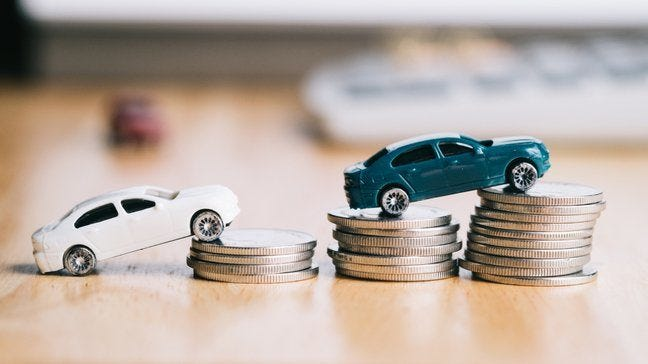

## **OBJECTIVE**

machine learning-based car price prediction system that assists both buyers and sellers in estimating the value of used automobiles. By leveraging data analysis and predictive modeling, the project aims to provide accurate and transparent pricing insights. The system will take into account various car attributes, including make, model, year, mileage, and condition, to generate price predictions.

The primary goals are to enhance the transparency and efficiency of the automotive market, ensuring fair transactions and informed decision-making. The project seeks to create a user-friendly platform that allows users to input car details and receive reliable price estimates. Additionally, it will educate users about the factors influencing car pricing, fostering a deeper understanding of the valuation process.

Ultimately, the project's objective is to empower individuals in the car market with a valuable tool that improves their ability to assess the worth of used vehicles, making the buying and selling process more equitable and efficient.

## **DATA SOURCE**

## **IMPORT LIBRARIES**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## **IMPORT DATA**

In [4]:
data = pd.read_csv('/content/car data.csv')

In [5]:
data.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

## **DATA CLEANING**

In [10]:
data.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


## **DATA VISUALIZATION**

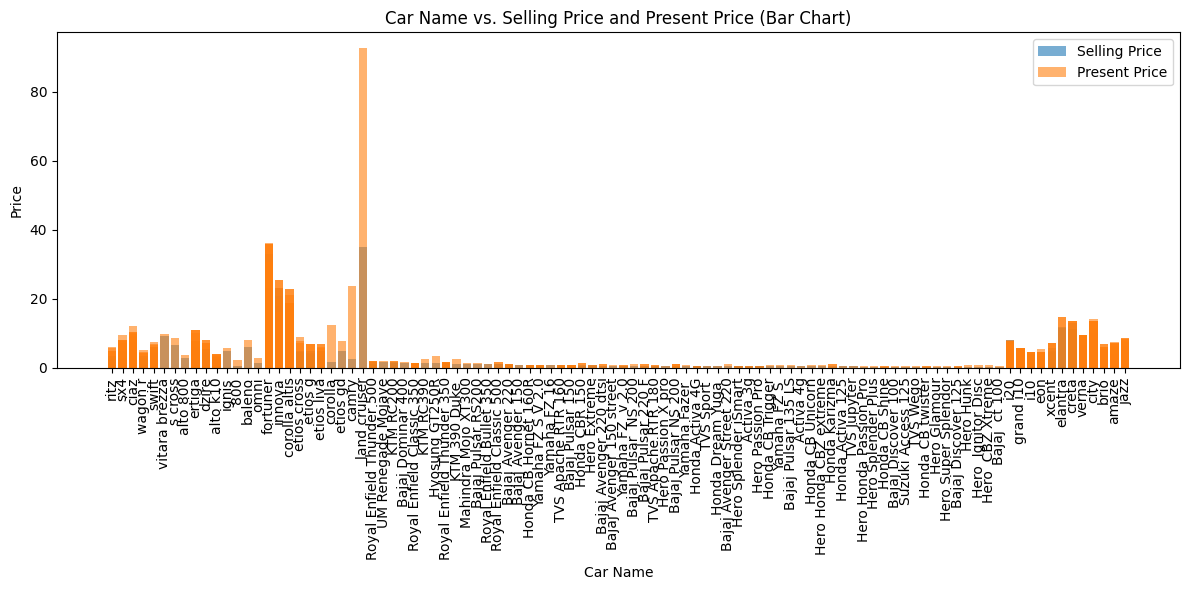

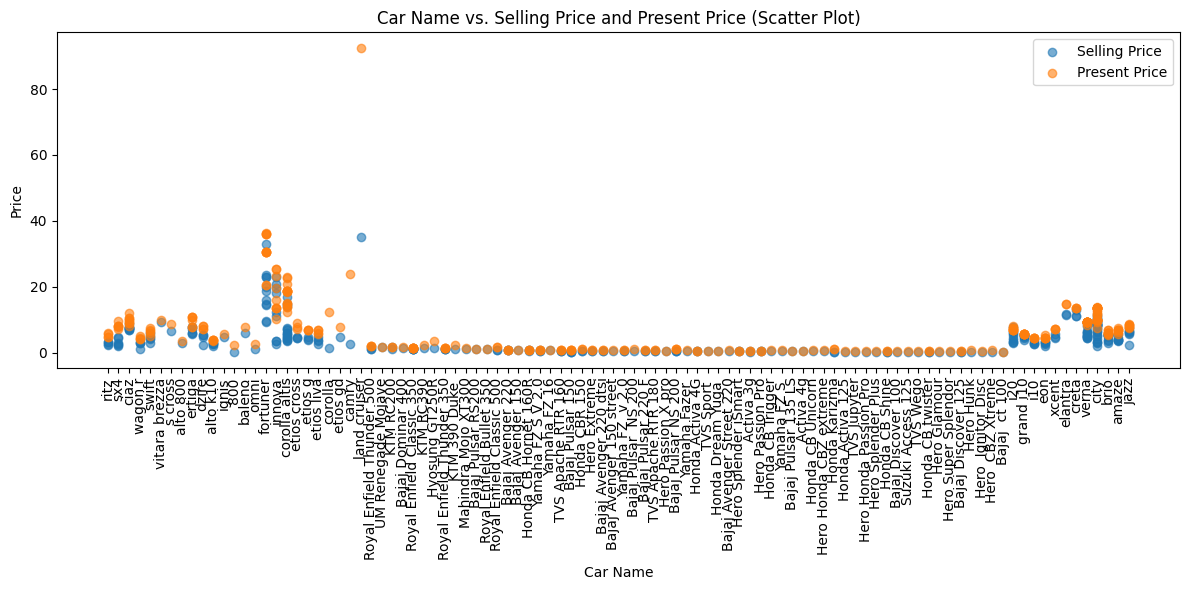

In [11]:

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(data['Car_Name'], data['Selling_Price'], label='Selling Price', alpha=0.6)
plt.bar(data['Car_Name'], data['Present_Price'], label='Present Price', alpha=0.6)
plt.xlabel('Car Name')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.legend()
plt.title('Car Name vs. Selling Price and Present Price (Bar Chart)')
plt.tight_layout()
plt.show()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(data['Car_Name'], data['Selling_Price'], label='Selling Price', alpha=0.6)
plt.scatter(data['Car_Name'], data['Present_Price'], label='Present Price', alpha=0.6)
plt.xlabel('Car Name')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.legend()
plt.title('Car Name vs. Selling Price and Present Price (Scatter Plot)')
plt.tight_layout()
plt.show()


        Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
86  land cruiser  2010          35.00          92.60       78000    Diesel   
64      fortuner  2017          33.00          36.23        6000    Diesel   
63      fortuner  2015          23.50          35.96       47000    Diesel   
82        innova  2017          23.00          25.39       15000    Diesel   
51      fortuner  2015          23.00          30.61       40000    Diesel   
93      fortuner  2015          23.00          30.61       40000    Diesel   
96        innova  2016          20.75          25.39       29000    Diesel   
59      fortuner  2014          19.99          35.96       41000    Diesel   
66        innova  2017          19.75          23.15       11000    Petrol   
62      fortuner  2014          18.75          35.96       78000    Diesel   

   Selling_type Transmission  Owner  
86       Dealer       Manual      0  
64       Dealer    Automatic      0  
63       Dealer    Automati

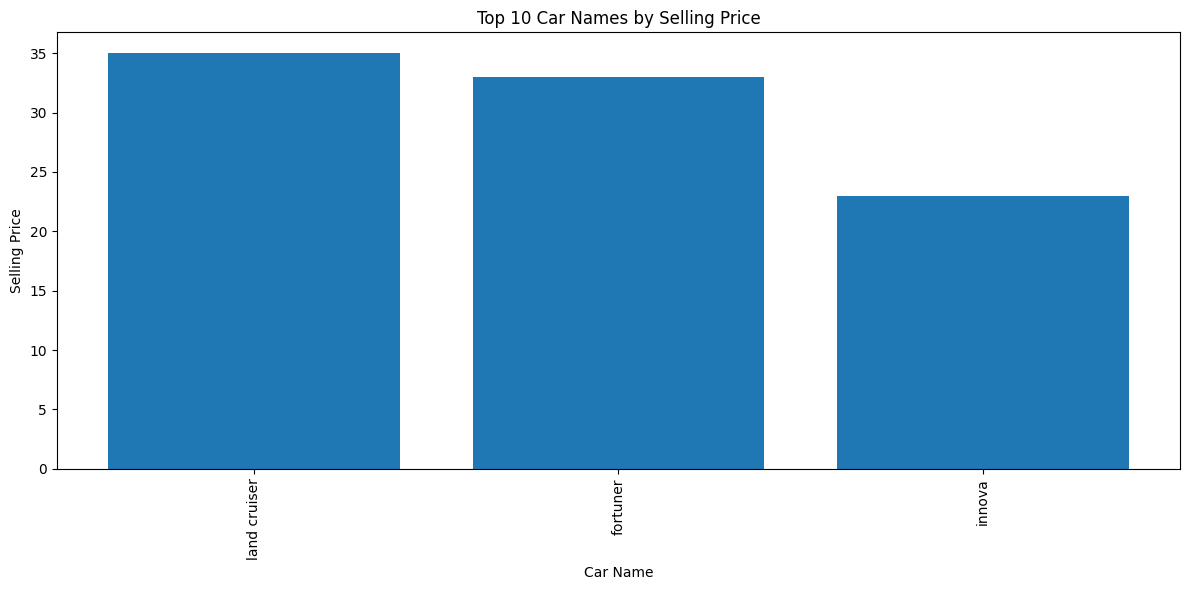

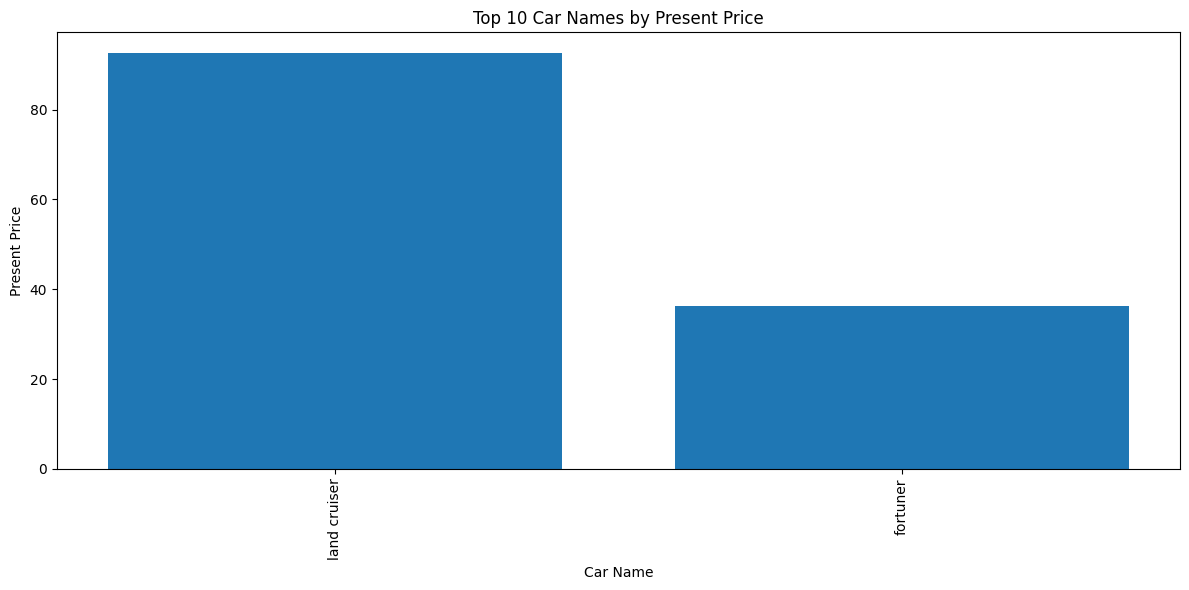

In [12]:

# Sort the dataset by Selling_Price and get the top 10 car names
top_10_selling = data.sort_values(by='Selling_Price', ascending=False).head(10)
print(top_10_selling)
# Sort the dataset by Present_Price and get the top 10 car names
top_10_present = data.sort_values(by='Present_Price', ascending=False).head(10)
print(top_10_present)
# Create a bar chart for the top 10 car names with the highest Selling_Price
plt.figure(figsize=(12, 6))
plt.bar(top_10_selling['Car_Name'], top_10_selling['Selling_Price'])
plt.xlabel('Car Name')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)
plt.title('Top 10 Car Names by Selling Price')
plt.tight_layout()
plt.show()

# Create a bar chart for the top 10 car names with the highest Present_Price
plt.figure(figsize=(12, 6))
plt.bar(top_10_present['Car_Name'], top_10_present['Present_Price'])
plt.xlabel('Car Name')
plt.ylabel('Present Price')
plt.xticks(rotation=90)
plt.title('Top 10 Car Names by Present Price')
plt.tight_layout()
plt.show()


<ipython-input-13-d74175c35da1>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


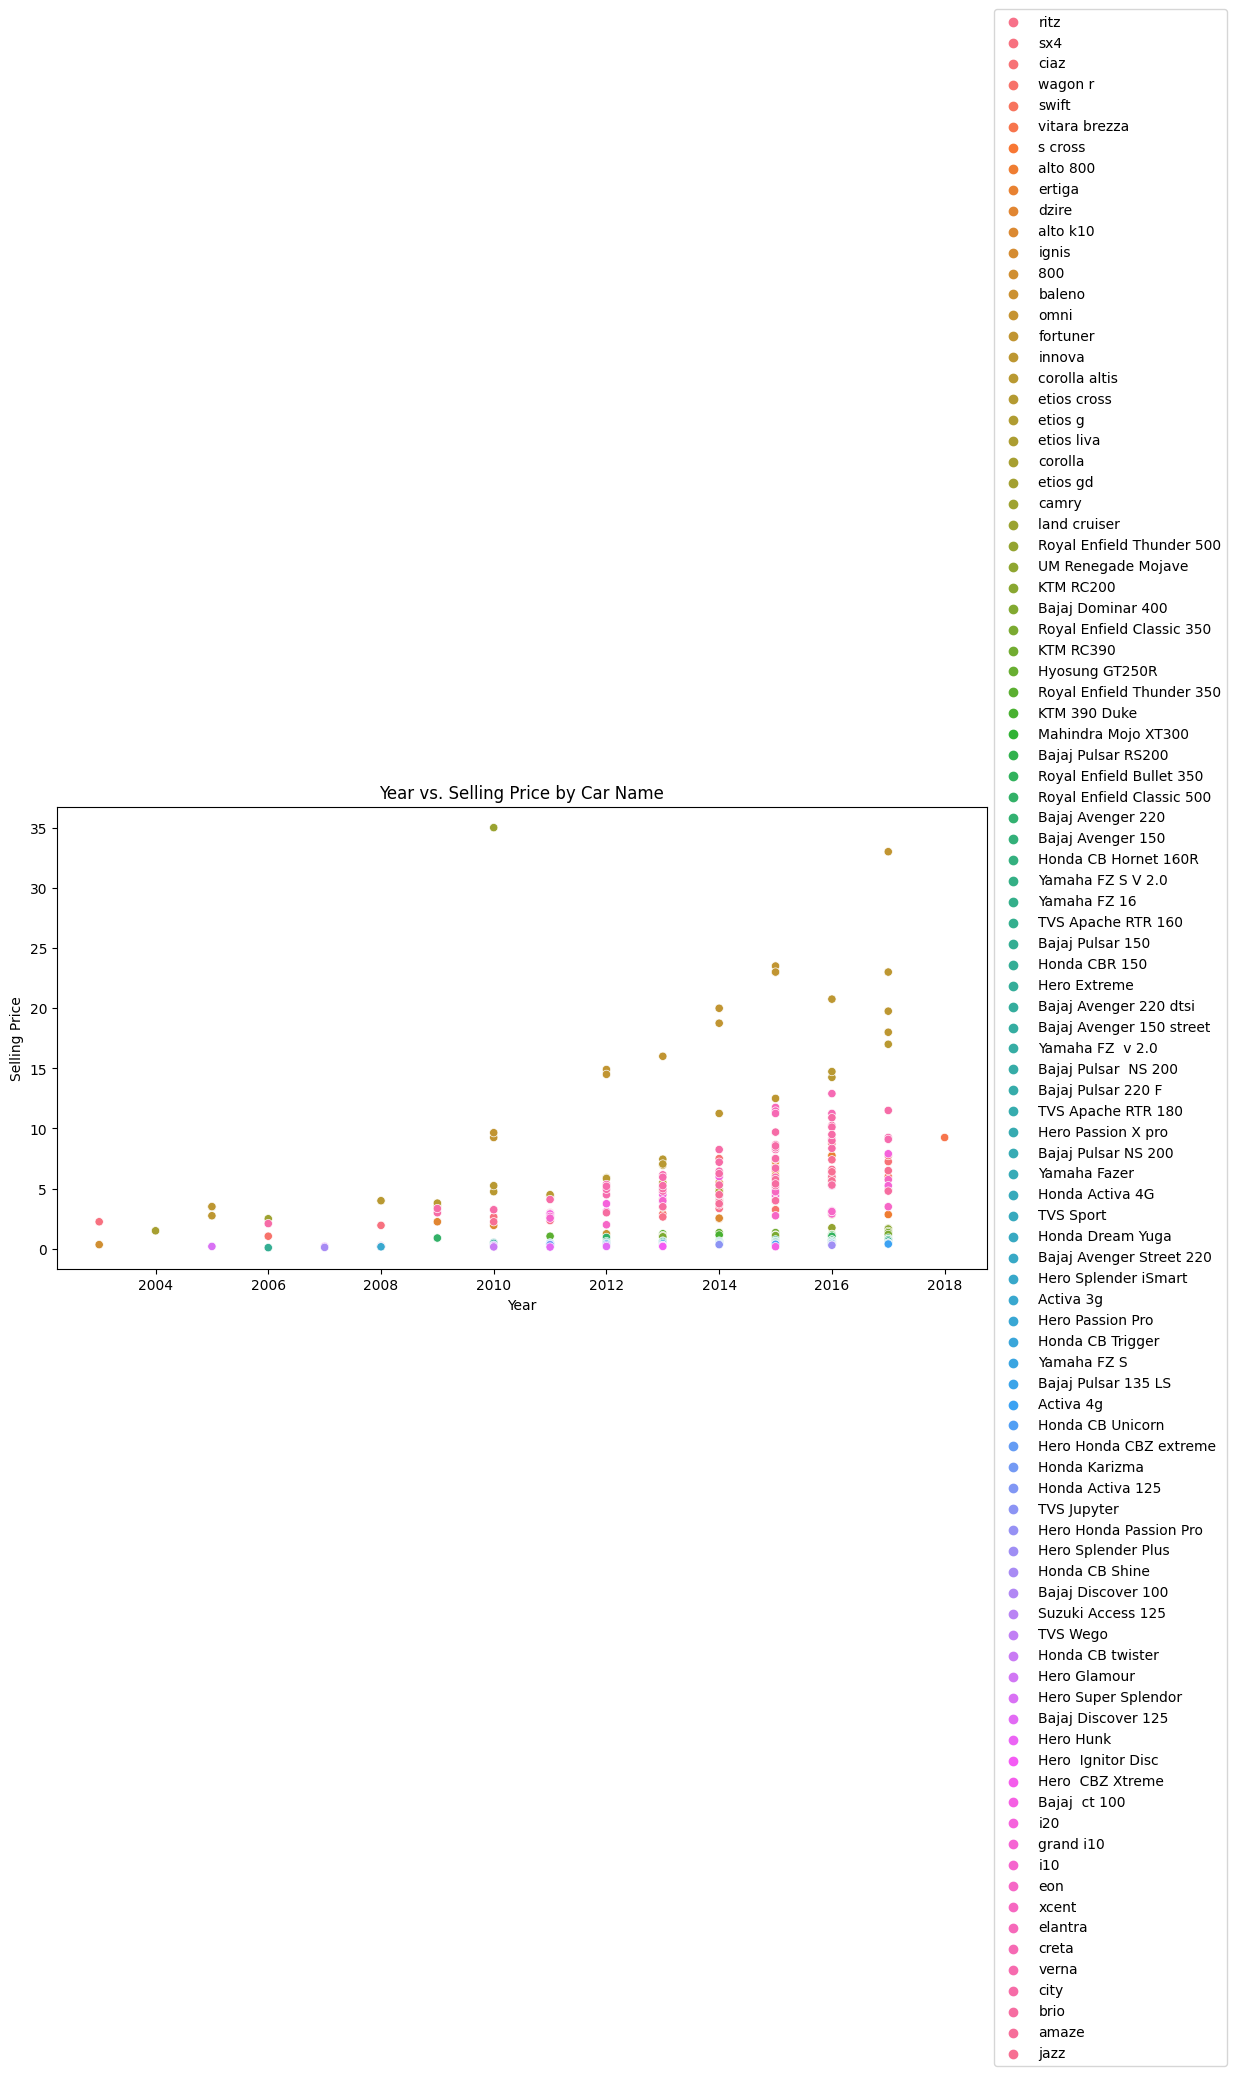

In [13]:
# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year', y='Selling_Price', hue='Car_Name', data=data)
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Year vs. Selling Price by Car Name')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

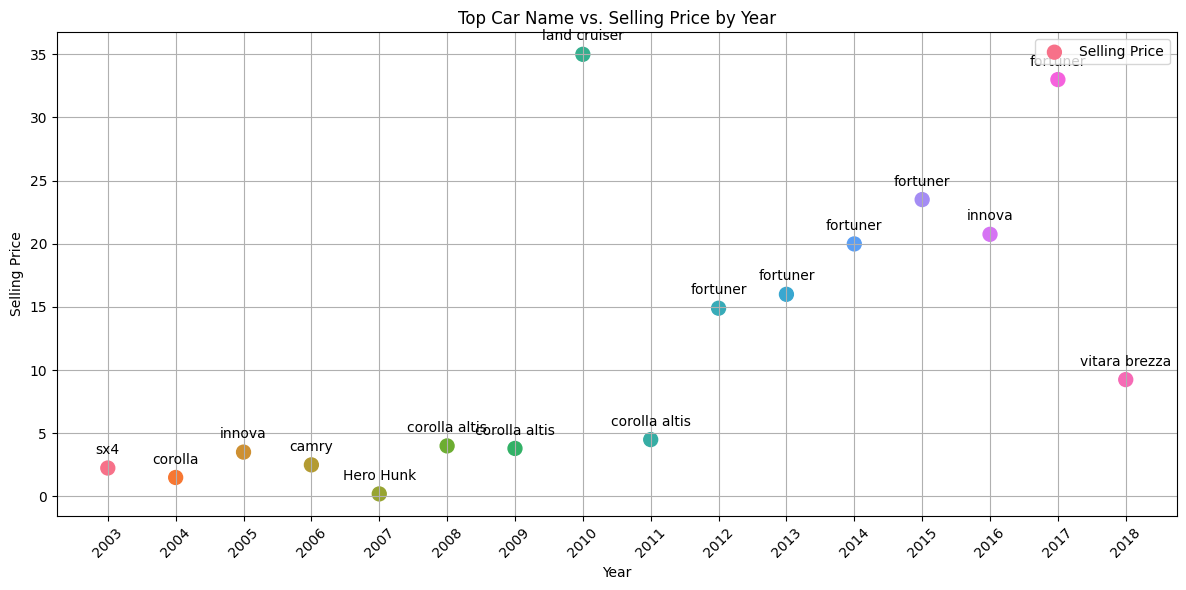

In [14]:
# Find the top car name for each year based on the highest selling price
top_cars_by_year = data.groupby('Year').apply(lambda x: x.loc[x['Selling_Price'].idxmax()])

# Define a custom color palette for the points
colors = sns.color_palette("husl", n_colors=len(top_cars_by_year))

# Create a plot
plt.figure(figsize=(12, 6))
plt.scatter(top_cars_by_year['Year'], top_cars_by_year['Selling_Price'], c=colors, label='Selling Price', s=100)
plt.xticks(top_cars_by_year['Year'], rotation=45)
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Top Car Name vs. Selling Price by Year')
plt.legend()
plt.grid(True)

# Annotate the top car name for each year
for i, row in top_cars_by_year.iterrows():
    plt.annotate(row['Car_Name'], (row['Year'], row['Selling_Price']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [16]:
# Find the car with the highest selling price
highest_selling_car = data.loc[data['Selling_Price'].idxmax()]

# Display the information about the car with the highest selling price
print("Car with the Highest Selling Price:")
print(highest_selling_car)

Car with the Highest Selling Price:
Car_Name         land cruiser
Year                     2010
Selling_Price            35.0
Present_Price            92.6
Driven_kms              78000
Fuel_Type              Diesel
Selling_type           Dealer
Transmission           Manual
Owner                       0
Name: 86, dtype: object


<ipython-input-28-509206d2115d>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


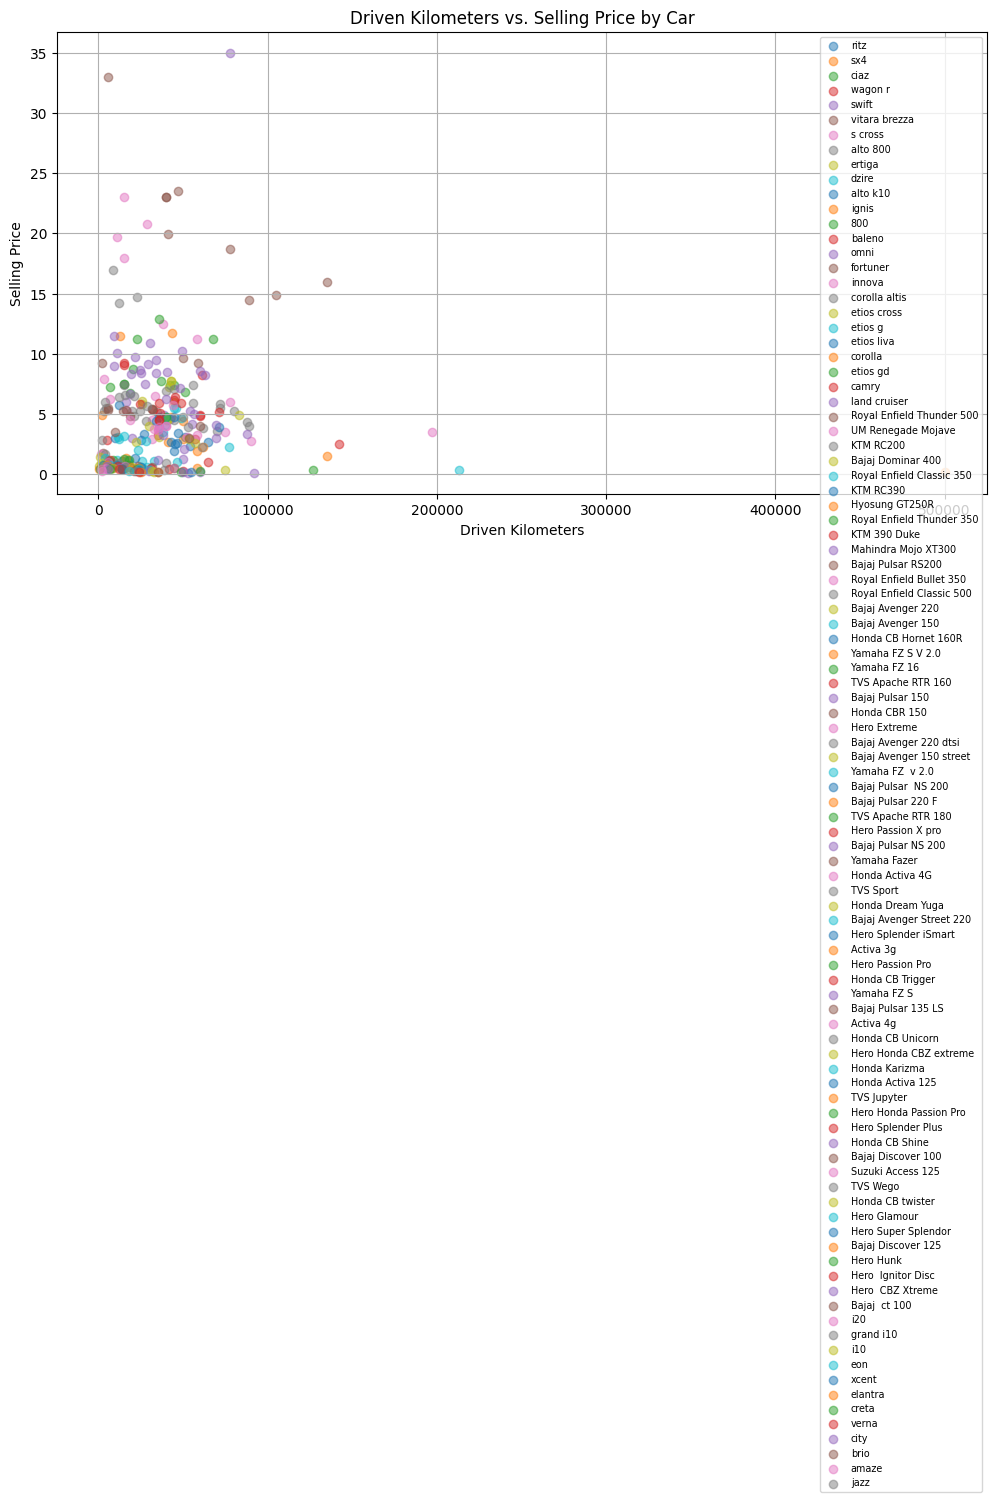

In [28]:

# Create a scatter plot for Driven_kms vs. Selling_Price for each car
plt.figure(figsize=(12, 6))

# Loop through unique car names and create a scatter plot for each
for car_name in data['Car_Name'].unique():
    car_data = data[data['Car_Name'] == car_name]
    plt.scatter(car_data['Driven_kms'], car_data['Selling_Price'], label=car_name, alpha=0.5)

plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price')
plt.title('Driven Kilometers vs. Selling Price by Car')
plt.legend(loc='upper right', fontsize='x-small')
plt.grid(True)

plt.tight_layout()
plt.show()


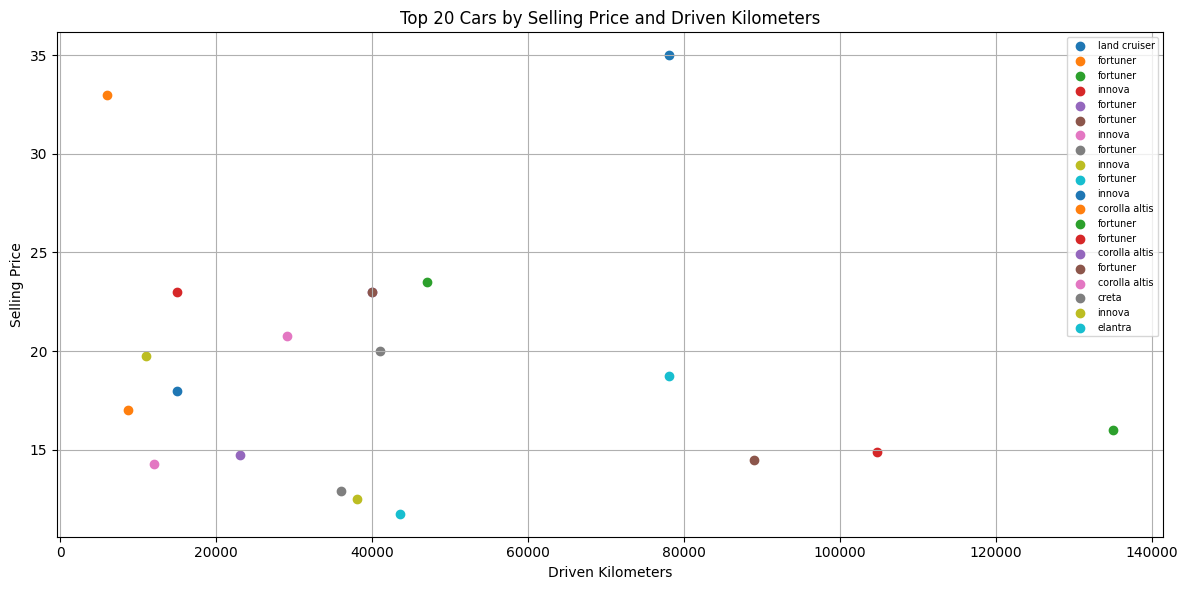

In [27]:

# Sort the data by Selling_Price and Driven_kms and get the top 20 cars
top_20_cars = data.sort_values(by=['Selling_Price', 'Driven_kms'], ascending=[False, True]).head(20)

# Create a scatter plot for the top 20 cars
plt.figure(figsize=(12, 6))

for i, row in top_20_cars.iterrows():
    plt.scatter(row['Driven_kms'], row['Selling_Price'], label=row['Car_Name'])

plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price')
plt.title('Top 20 Cars by Selling Price and Driven Kilometers')
plt.legend(loc='upper right', fontsize='x-small')
plt.grid(True)

plt.tight_layout()
plt.show()


In [26]:
# Calculate summary statistics
avg_selling_price = top_20_cars['Selling_Price'].mean()
avg_driven_kms = top_20_cars['Driven_kms'].mean()

# Print summary statistics
print(f'Average Selling Price: {avg_selling_price:.2f}')
print(f'Average Driven Kilometers: {avg_driven_kms:.2f}')


Average Selling Price: 19.31
Average Driven Kilometers: 44493.80


In [25]:
# Calculate the correlation between driven kilometers and selling price
correlation = top_20_cars['Driven_kms'].corr(top_20_cars['Selling_Price'])
print(f'Correlation between Driven Kilometers and Selling Price: {correlation:.2f}')


Correlation between Driven Kilometers and Selling Price: -0.11


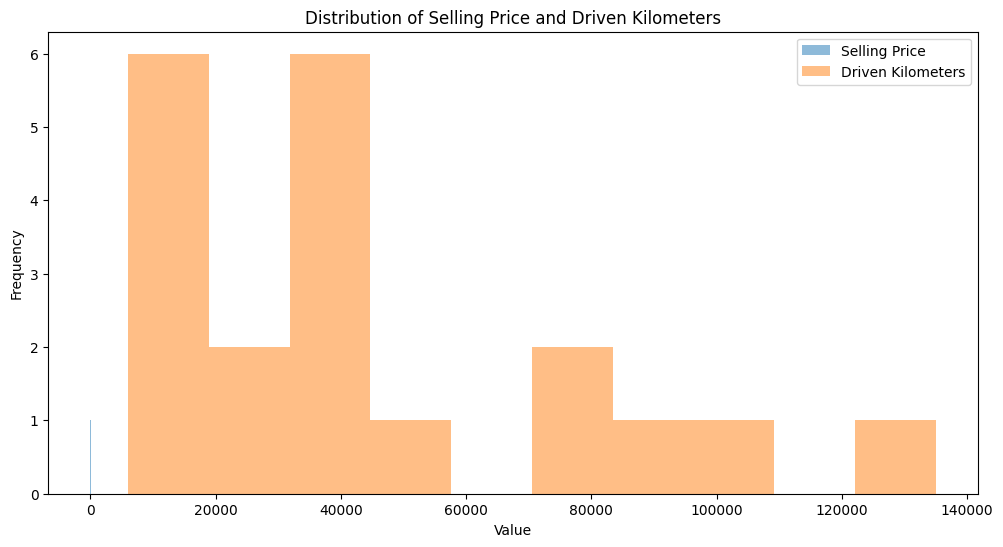

In [24]:
# Create histograms to visualize the distributions
plt.figure(figsize=(12, 6))
plt.hist(top_20_cars['Selling_Price'], bins=10, alpha=0.5, label='Selling Price')
plt.hist(top_20_cars['Driven_kms'], bins=10, alpha=0.5, label='Driven Kilometers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Price and Driven Kilometers')
plt.legend()
plt.show()


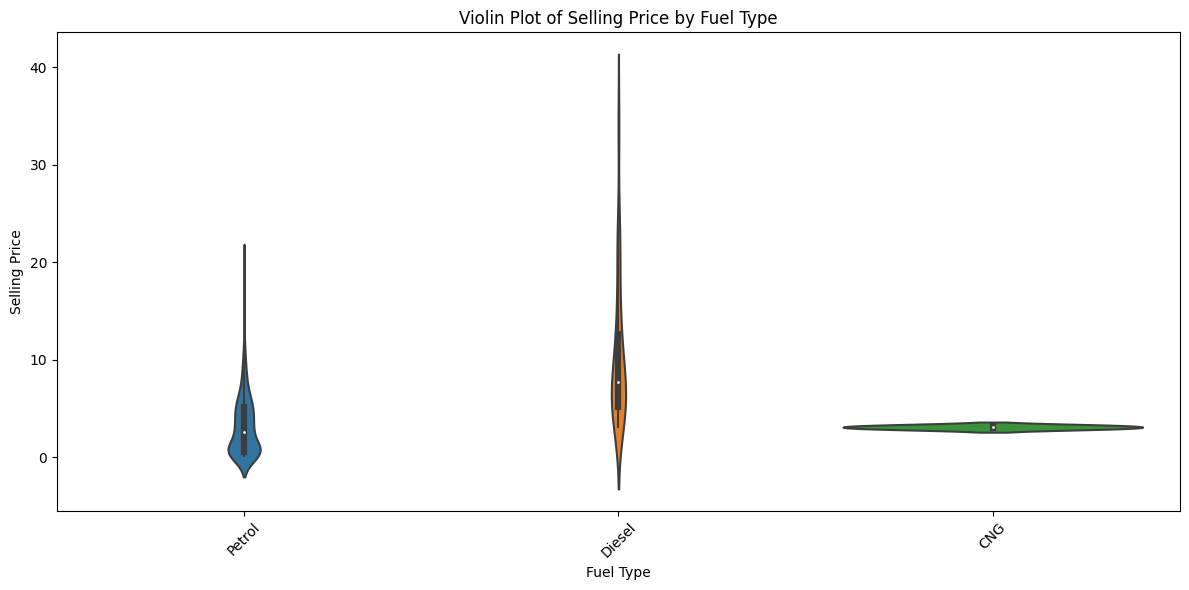

In [23]:
# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x="Fuel_Type", y="Selling_Price", data=data)
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.title('Violin Plot of Selling Price by Fuel Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-22-a12e3178221f>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


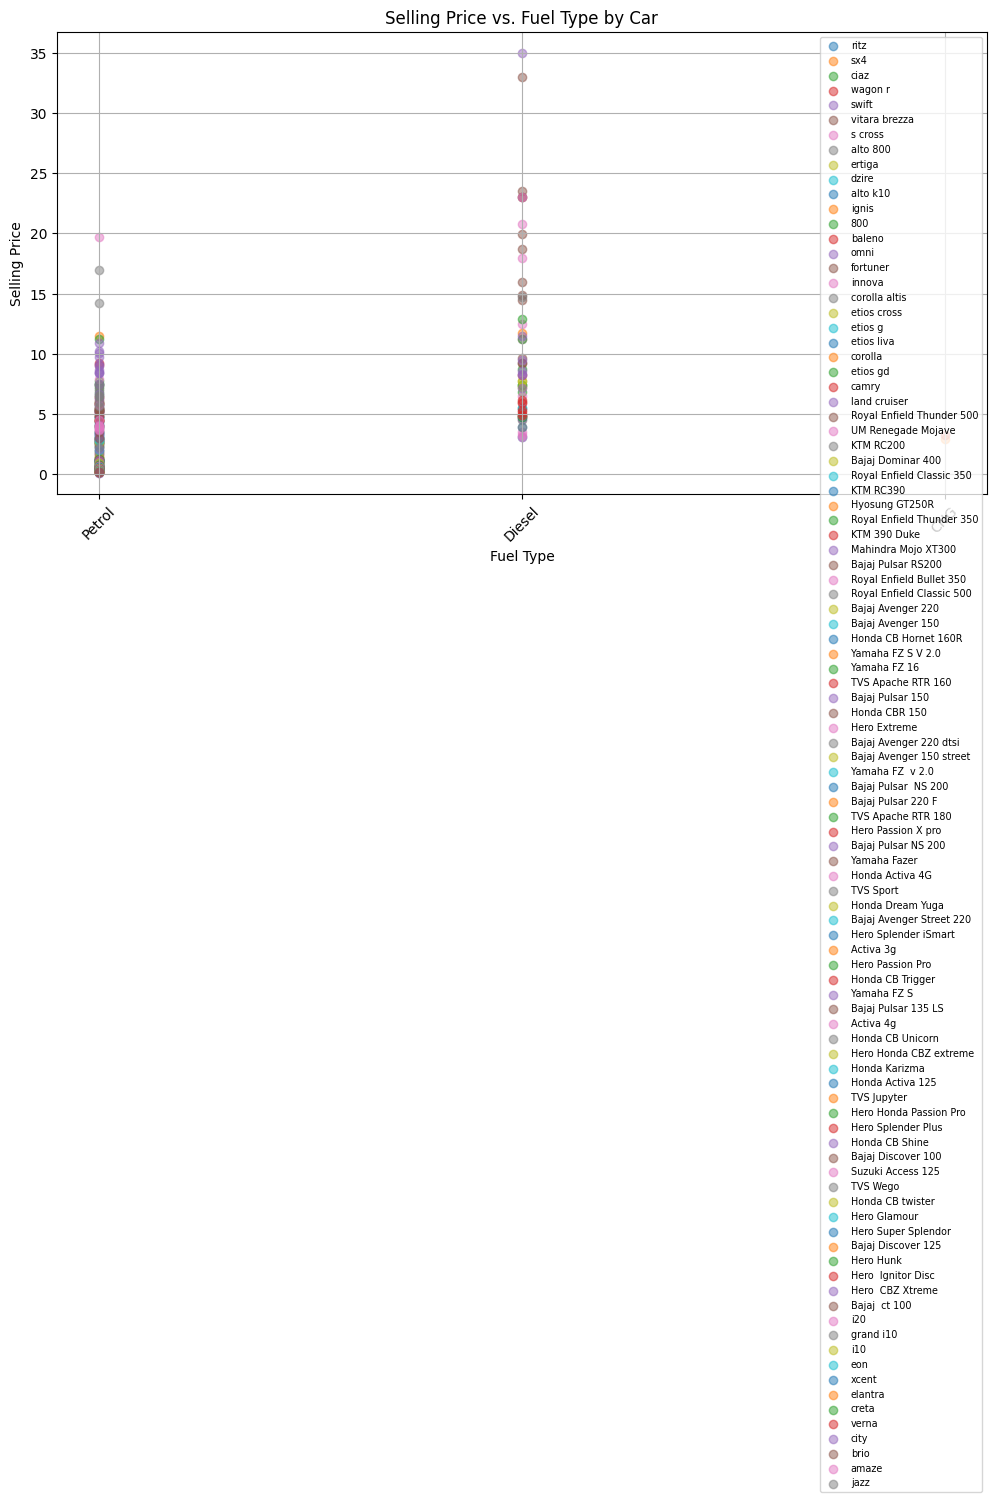

In [22]:

# Create a scatter plot for Selling_Price vs. Fuel_Type for each car
plt.figure(figsize=(12, 6))

# Loop through unique car names and create a scatter plot for each
for car_name in data['Car_Name'].unique():
    car_data = data[data['Car_Name'] == car_name]
    plt.scatter(car_data['Fuel_Type'], car_data['Selling_Price'], label=car_name, alpha=0.5)

plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Fuel Type by Car')
plt.legend(loc='upper right', fontsize='x-small')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

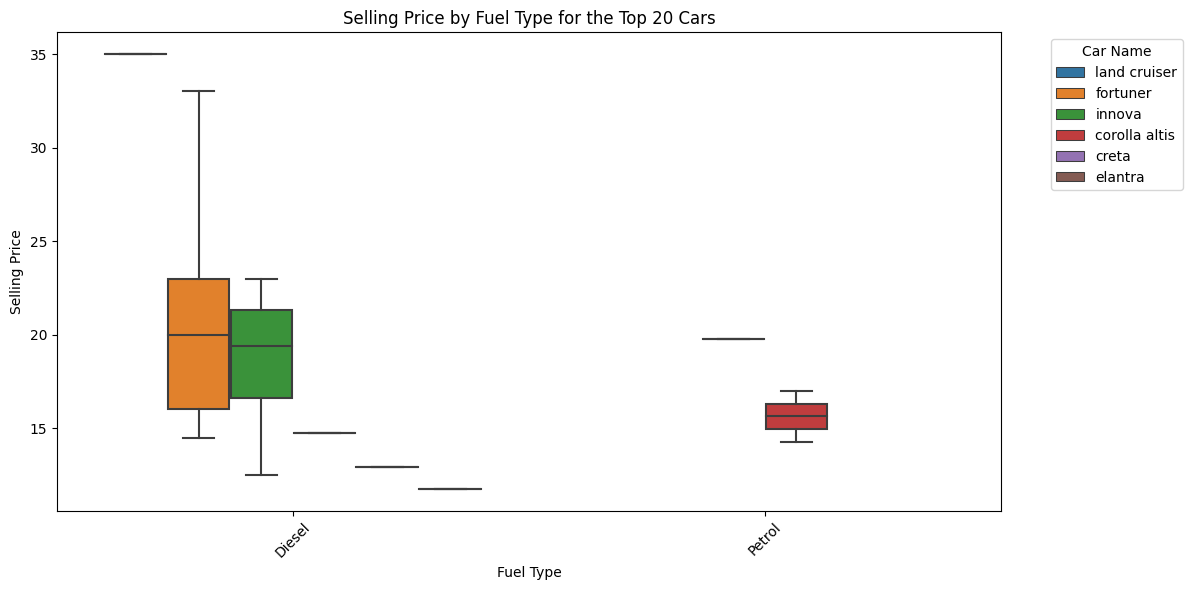

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/content/car data.csv')

# Sort the data by Selling_Price and get the top 20 cars
top_20_cars = data.sort_values(by='Selling_Price', ascending=False).head(20)

# Create a box plot for Selling_Price by Fuel_Type for the top 20 cars
plt.figure(figsize=(12, 6))
sns.boxplot(x="Fuel_Type", y="Selling_Price", data=top_20_cars, hue="Car_Name")
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.title('Selling Price by Fuel Type for the Top 20 Cars')
plt.xticks(rotation=45)
plt.legend(title="Car Name", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()


Correlation between Selling Price and Present Price: 0.88


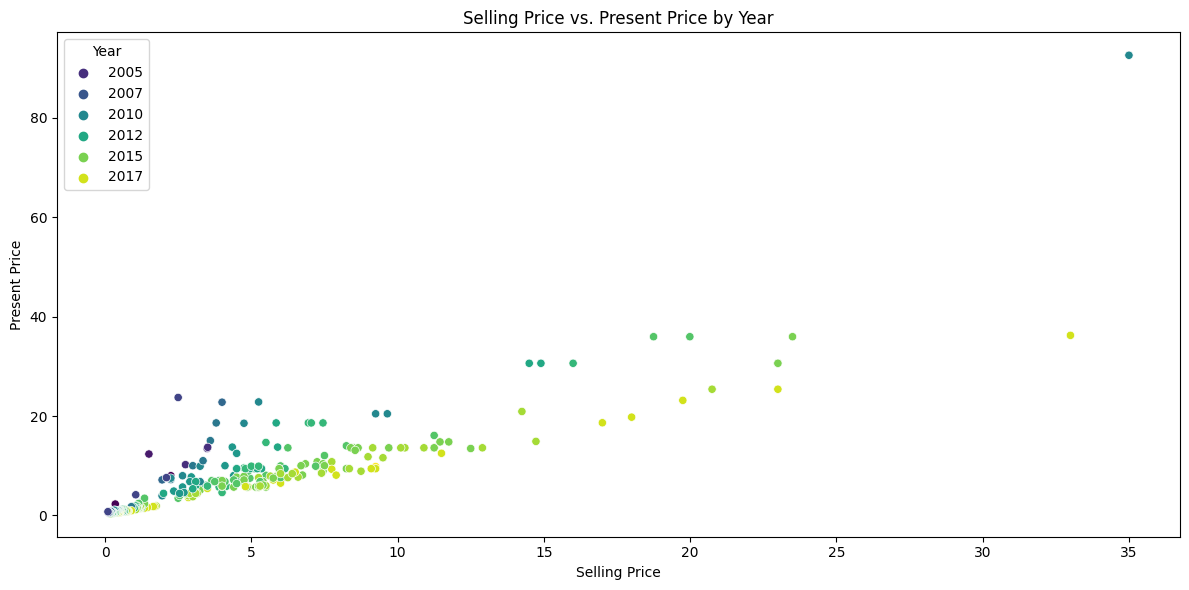

In [18]:
# Create a scatter plot for Selling_Price vs. Present_Price by Year
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Selling_Price", y="Present_Price", data=data, hue="Year", palette="viridis")
plt.xlabel('Selling Price')
plt.ylabel('Present Price')
plt.title('Selling Price vs. Present Price by Year')
plt.legend(title="Year")
plt.tight_layout()

# Calculate and print the correlation coefficient
correlation = data['Selling_Price'].corr(data['Present_Price'])
print(f'Correlation between Selling Price and Present Price: {correlation:.2f}')

plt.show()

In [ ]:
# Calculate and print the correlation coefficient
correlation = data['Selling_Price'].corr(data['Present_Price'])
print(f'Correlation between Selling Price and Present Price: {correlation:.2f}')


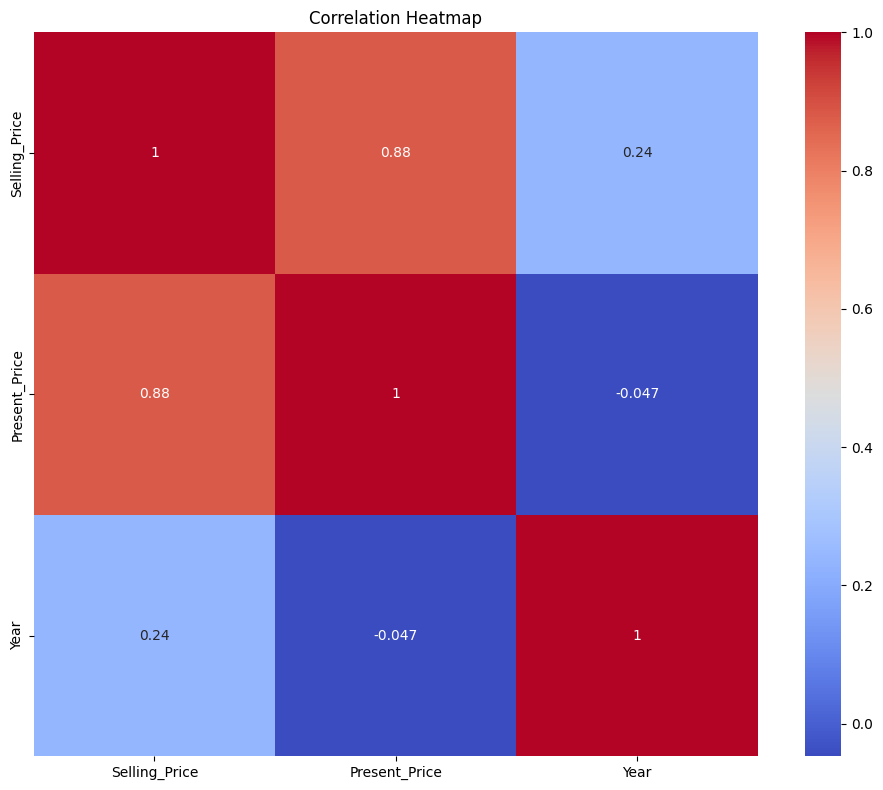

In [17]:
# Select the relevant numeric variables for the heatmap
numeric_vars = ['Selling_Price', 'Present_Price', 'Year']

# Calculate the correlation matrix
correlation_matrix = data[numeric_vars].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()

plt.show()

## **DATA MODELING**

### **MODEL -1 - naive model**

In [56]:

# Define features and target variable
X = data.drop('Selling_Price', axis=1)  # Features
y = data['Selling_Price']  # Target variable

In [57]:

# Define which columns should be one-hot encoded
one_hot_cols = ['Selling_type', 'Transmission']

In [58]:
# Define column transformer to apply transformations to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Year', 'Present_Price', 'Driven_kms']),
        ('cat', OneHotEncoder(), one_hot_cols)
    ],
    remainder='passthrough'  # Any remaining columns are untouched
)


In [59]:

# Create a pipeline for preprocessing
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


In [60]:

# Apply preprocessing
X = preprocessing_pipeline.fit_transform(X)


In [61]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
# Calculate the mean of the target variable 'Selling_Price' in the training data
mean_selling_price = y_train.mean()


In [63]:

# Create a list of the same length as the test set, filled with the mean value
naive_predictions = [mean_selling_price] * len(y_test)

In [64]:

# Evaluate the naive model
mse = mean_squared_error(y_test, naive_predictions)
r2 = r2_score(y_test, naive_predictions)


In [65]:

print("Mean Squared Error (Naive Model):", mse)
print("R-squared (R2) Score (Naive Model):", r2)

Mean Squared Error (Naive Model): 23.044378065943768
R-squared (R2) Score (Naive Model): -0.00038173746560565824


In [67]:
data.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [72]:
# Replace 'Petrol' with 0 and 'Diesel' with 1 in the 'Fuel_Type' column
data['Fuel_Type'] = data['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Driven_kms     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Selling_type   301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [85]:


# Load your dataset
data = pd.read_csv('/content/car data.csv')

# Convert 'Fuel_Type' to numerical (0 for 'Petrol' and 1 for 'Diesel')
data['Fuel_Type'] = data['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1})

# Perform one-hot encoding for other object-type columns
data = pd.get_dummies(data, columns=['Selling_type', 'Transmission'])

# Now, 'Fuel_Type', 'Selling_type', and 'Transmission' are numerical


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car_Name                 301 non-null    object 
 1   Year                     301 non-null    int64  
 2   Selling_Price            301 non-null    float64
 3   Present_Price            301 non-null    float64
 4   Driven_kms               301 non-null    int64  
 5   Fuel_Type                301 non-null    object 
 6   Owner                    301 non-null    int64  
 7   Selling_type_Dealer      301 non-null    uint8  
 8   Selling_type_Individual  301 non-null    uint8  
 9   Transmission_Automatic   301 non-null    uint8  
 10  Transmission_Manual      301 non-null    uint8  
dtypes: float64(2), int64(3), object(2), uint8(4)
memory usage: 17.8+ KB


In [87]:
# Check the unique values in the 'Fuel_Type' column
print(data['Fuel_Type'].unique())

# Convert 'Fuel_Type' to numerical (0 for 'Petrol' and 1 for 'Diesel')
data['Fuel_Type'] = data['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2})

# Now, 'Fuel_Type' should be numerical
print(data['Fuel_Type'].unique())

[0 1 'CNG']
[0 1 2]


In [88]:
data.dtypes

Car_Name                    object
Year                         int64
Selling_Price              float64
Present_Price              float64
Driven_kms                   int64
Fuel_Type                    int64
Owner                        int64
Selling_type_Dealer          uint8
Selling_type_Individual      uint8
Transmission_Automatic       uint8
Transmission_Manual          uint8
dtype: object

In [89]:
# Save the modified dataset to a new CSV file
data.to_csv('/content/modified_car_data.csv', index=False)

In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the modified dataset
data = pd.read_csv('/content/modified_car_data.csv')
data.columns




Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Owner', 'Selling_type_Dealer', 'Selling_type_Individual',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

In [106]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Owner', 'Selling_type_Dealer', 'Selling_type_Individual',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

In [107]:
# Drop the 'Car_Name' column
data = data.drop('Car_Name', axis=1)

In [108]:
data.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Owner', 'Selling_type_Dealer', 'Selling_type_Individual',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

### **MODEL 2 - LinearRegression**

In [113]:



# Define features and target variable
X = data.drop('Selling_Price', axis=1)  # Features
y = data['Selling_Price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test data
linear_predictions = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, linear_predictions)
r2 = r2_score(y_test, linear_predictions)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error: 3.5315798889735444
R-squared (R2) Score: 0.8466902419661697


### **MODEL -3 - RandomForestRegressor**

In [114]:
# Create and train a Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
random_forest_predictions = random_forest_model.predict(X_test)

# Evaluate the Random Forest model
mse = mean_squared_error(y_test, random_forest_predictions)
r2 = r2_score(y_test, random_forest_predictions)

print("Mean Squared Error (Random Forest):", mse)
print("R-squared (R2) Score (Random Forest):", r2)

Mean Squared Error (Random Forest): 0.8760266995081957
R-squared (R2) Score (Random Forest): 0.9619707197472427


In [115]:
# Create and train a Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
random_forest_predictions = random_forest_model.predict(X_test)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, random_forest_predictions)
rf_r2 = r2_score(y_test, random_forest_predictions)

# Create and train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test data
linear_predictions = linear_model.predict(X_test)

# Evaluate the Linear Regression model
lr_mse = mean_squared_error(y_test, linear_predictions)
lr_r2 = r2_score(y_test, linear_predictions)

# Evaluate the naive model
naive_mse = mean_squared_error(y_test, naive_predictions)
naive_r2 = r2_score(y_test, naive_predictions)

# Compare the models
print("Random Forest Model:")
print("Mean Squared Error:", rf_mse)
print("R-squared (R2) Score:", rf_r2)

print("\nLinear Regression Model:")
print("Mean Squared Error:", lr_mse)
print("R-squared (R2) Score:", lr_r2)

print("\nNaive Model:")
print("Mean Squared Error (Naive Model):", naive_mse)
print("R-squared (R2) Score (Naive Model):", naive_r2)


Random Forest Model:
Mean Squared Error: 0.8760266995081957
R-squared (R2) Score: 0.9619707197472427

Linear Regression Model:
Mean Squared Error: 3.5315798889735444
R-squared (R2) Score: 0.8466902419661697

Naive Model:
Mean Squared Error (Naive Model): 23.044378065943768
R-squared (R2) Score (Naive Model): -0.00038173746560565824


In [116]:
# Define the model names and their respective MSE and R2 scores
models = {
    "Random Forest Model": (rf_mse, rf_r2),
    "Linear Regression Model": (lr_mse, lr_r2),
    "Naive Model": (naive_mse, naive_r2),
}

# Find the best model based on the lowest MSE and the highest R2 score
best_model_name = min(models, key=lambda x: (models[x][0], -models[x][1]))
best_mse, best_r2 = models[best_model_name]

# Print the results
print("Best Model:", best_model_name)
print("Mean Squared Error (Best Model):", best_mse)
print("R-squared (R2) Score (Best Model):", best_r2)

Best Model: Random Forest Model
Mean Squared Error (Best Model): 0.8760266995081957
R-squared (R2) Score (Best Model): 0.9619707197472427
